Custom Logistic Regression Accuracy: 0.855
Scikit-Learn Logistic Regression Accuracy: 0.855


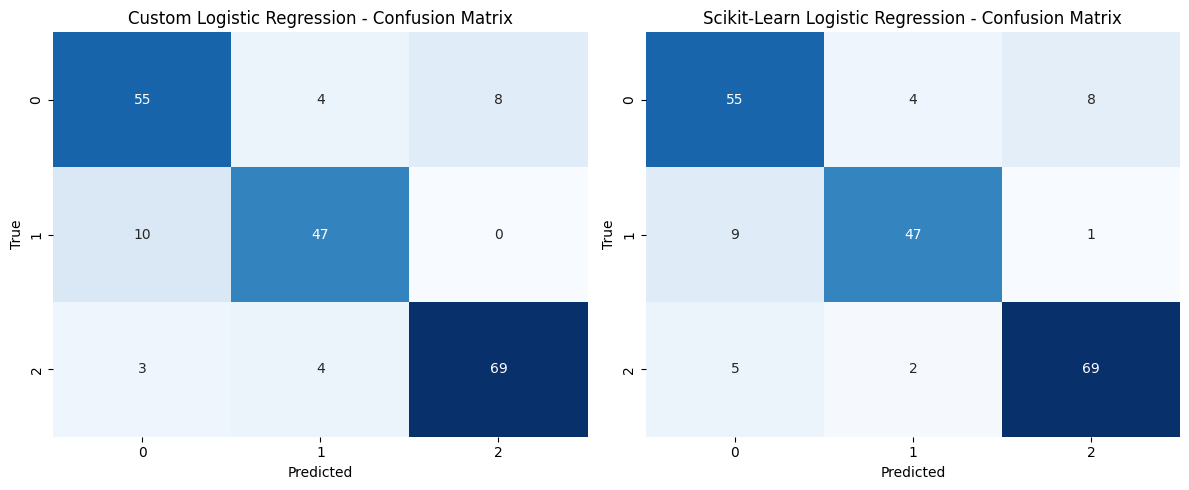

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Generate random data
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,  # Set n_clusters_per_class to 1
    random_state=42
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement your own Logistic Regression
class LogisticRegressionMultiClass:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cost_function(self, X, y, theta):
        m = len(y)
        h = self.softmax(np.dot(X, theta))
        cost = -1 / m * np.sum(y * np.log(h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        y_one_hot = np.eye(len(np.unique(y)))[y]

        # Add intercept term to X
        X = np.column_stack((np.ones(m), X))

        self.theta = np.zeros((n + 1, len(np.unique(y))))

        for i in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.softmax(z)
            gradient = np.dot(X.T, (h - y_one_hot)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        return np.argmax(self.softmax(np.dot(X, self.theta)), axis=1)

# Train your own Logistic Regression
custom_model = LogisticRegressionMultiClass()
custom_model.fit(X_train, y_train)
custom_predictions = custom_model.predict(X_test)

# Use scikit-learn Logistic Regression
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

# Compare accuracies
custom_accuracy = accuracy_score(y_test, custom_predictions)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"Custom Logistic Regression Accuracy: {custom_accuracy}")
print(f"Scikit-Learn Logistic Regression Accuracy: {sklearn_accuracy}")

# Visualize misclassified samples using confusion matrix
conf_matrix_custom = confusion_matrix(y_test, custom_predictions)
conf_matrix_sklearn = confusion_matrix(y_test, sklearn_predictions)

# Plot confusion matrix using seaborn
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Custom Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_sklearn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Scikit-Learn Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()
